In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from sklearn.metrics import classification_report,confusion_matrix,r2_score
plt.style.use ("dark_background")

In [2]:
dataset = pd.read_excel ('Z-Alizadeh sani dataset.xlsx')
dataset

,Age,Weight,Length,Sex,BMI,DM,HTN,Current Smoker,EX-Smoker,FH,...,K,Na,WBC,Lymph,Neut,PLT,EF-TTE,Region RWMA,VHD,Cath
0,53,90,175,Male,29.387755,0,1,1,0,0,...,4.7,141,5700,39,52,261,50,0,N,Cad
1,67,70,157,Fmale,28.398718,0,1,0,0,0,...,4.7,156,7700,38,55,165,40,4,N,Cad
2,54,54,164,Male,20.077335,0,0,1,0,0,...,4.7,139,7400,38,60,230,40,2,mild,Cad
3,66,67,158,Fmale,26.838648,0,1,0,0,0,...,4.4,142,13000,18,72,742,55,0,Severe,Normal
4,50,87,153,Fmale,37.165193,0,1,0,0,0,...,4.0,140,9200,55,39,274,50,0,Severe,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,58,84,168,Male,29.761905,0,0,0,0,0,...,4.8,146,8500,34,58,251,45,0,N,Cad
299,55,64,152,Fmale,27.700831,0,0,0,0,0,...,4.0,139,11400,16,80,377,40,0,mild,Normal
300,48,77,160,Fmale,30.078125,0,1,0,0,1,...,4.0,140,9000,35,55,279,55,0,N,Normal
301,57,90,159,Fmale,35.599858,1,0,0,0,0,...,3.8,141,3800,48,40,208,55,0,N,Normal


In [3]:
dataset.info()
dataset.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 56 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    303 non-null    int64  
 1   Weight                 303 non-null    int64  
 2   Length                 303 non-null    int64  
 3   Sex                    303 non-null    object 
 4   BMI                    303 non-null    float64
 5   DM                     303 non-null    int64  
 6   HTN                    303 non-null    int64  
 7   Current Smoker         303 non-null    int64  
 8   EX-Smoker              303 non-null    int64  
 9   FH                     303 non-null    int64  
 10  Obesity                303 non-null    object 
 11  CRF                    303 non-null    object 
 12  CVA                    303 non-null    object 
 13  Airway disease         303 non-null    object 
 14  Thyroid Disease        303 non-null    object 
 15  CHF   

Age                      0
Weight                   0
Length                   0
Sex                      0
BMI                      0
DM                       0
HTN                      0
Current Smoker           0
EX-Smoker                0
FH                       0
Obesity                  0
CRF                      0
CVA                      0
Airway disease           0
Thyroid Disease          0
CHF                      0
DLP                      0
BP                       0
PR                       0
Edema                    0
Weak Peripheral Pulse    0
Lung rales               0
Systolic Murmur          0
Diastolic Murmur         0
Typical Chest Pain       0
Dyspnea                  0
Function Class           0
Atypical                 0
Nonanginal               0
Exertional CP            0
LowTH Ang                0
Q Wave                   0
St Elevation             0
St Depression            0
Tinversion               0
LVH                      0
Poor R Progression       0
B

In [4]:
dataset.describe()

,Age,Weight,Length,BMI,DM,HTN,Current Smoker,EX-Smoker,FH,BP,...,ESR,HB,K,Na,WBC,Lymph,Neut,PLT,EF-TTE,Region RWMA
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,...,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,58.897690,73.831683,164.716172,27.248339,0.297030,0.590759,0.207921,0.033003,0.158416,129.554455,...,19.462046,13.153465,4.230693,140.996700,7562.046205,32.399340,60.148515,221.488449,47.231023,0.620462
std,10.392278,11.987358,9.327661,4.098865,0.457706,0.492507,0.406491,0.178941,0.365734,18.938105,...,15.936475,1.610452,0.458202,3.807885,2413.739323,9.972592,10.182493,60.796199,8.927194,1.132531
min,30.000000,48.000000,140.000000,18.115413,0.000000,0.000000,0.000000,0.000000,0.000000,90.000000,...,1.000000,8.900000,3.000000,128.000000,3700.000000,7.000000,32.000000,25.000000,15.000000,0.000000
25%,51.000000,65.000000,158.000000,24.514380,0.000000,0.000000,0.000000,0.000000,0.000000,120.000000,...,9.000000,12.200000,3.900000,139.000000,5800.000000,26.000000,52.500000,183.500000,45.000000,0.000000
50%,58.000000,74.000000,165.000000,26.775510,0.000000,1.000000,0.000000,0.000000,0.000000,130.000000,...,15.000000,13.200000,4.200000,141.000000,7100.000000,32.000000,60.000000,210.000000,50.000000,0.000000
75%,66.000000,81.000000,171.000000,29.411765,1.000000,1.000000,0.000000,0.000000,0.000000,140.000000,...,26.000000,14.200000,4.500000,143.000000,8800.000000,39.000000,67.000000,250.000000,55.000000,1.000000
max,86.000000,120.000000,188.000000,40.900658,1.000000,1.000000,1.000000,1.000000,1.000000,190.000000,...,90.000000,17.600000,6.600000,156.000000,18000.000000,60.000000,89.000000,742.000000,60.000000,4.000000


In [5]:
dataset.corr()

,Age,Weight,Length,BMI,DM,HTN,Current Smoker,EX-Smoker,FH,BP,...,ESR,HB,K,Na,WBC,Lymph,Neut,PLT,EF-TTE,Region RWMA
Age,1.000000,-0.264585,-0.163753,-0.161414,0.072543,0.246690,-0.143879,0.076608,-0.183900,0.215527,...,0.183127,-0.161018,0.154203,-0.071886,0.020398,-0.171529,0.173030,-0.049500,-0.140512,0.108663
Weight,-0.264585,1.000000,0.460631,0.725005,-0.003531,-0.028532,0.157385,0.068977,0.021963,-0.025930,...,-0.139314,0.274218,-0.018287,0.013916,-0.020214,0.020120,-0.051093,-0.094192,0.026789,-0.007648
Length,-0.163753,0.460631,1.000000,-0.269356,-0.052318,-0.153668,0.335248,0.079034,0.004488,-0.072511,...,-0.222182,0.341028,-0.086277,-0.066590,0.066658,-0.156436,0.115075,-0.133446,-0.093295,0.095715
BMI,-0.161414,0.725005,-0.269356,1.000000,0.045360,0.091652,-0.089398,0.005016,0.014045,0.031916,...,0.023259,0.031107,0.044587,0.067402,-0.074928,0.139583,-0.140037,-0.003964,0.093903,-0.079739
DM,0.072543,-0.003531,-0.052318,0.045360,1.000000,0.217864,-0.208458,-0.120087,-0.064434,0.128010,...,0.190397,-0.156382,0.100064,-0.083030,0.110345,0.033413,-0.024417,0.051054,-0.052507,0.064891
HTN,0.246690,-0.028532,-0.153668,0.091652,0.217864,1.000000,-0.169000,0.041045,-0.098467,0.570418,...,0.161704,-0.115935,0.011826,0.036355,-0.069374,0.017204,-0.025476,-0.043840,0.031365,-0.000372
Current Smoker,-0.143879,0.157385,0.335248,-0.089398,-0.208458,-0.169000,1.000000,-0.094652,0.089532,-0.079115,...,-0.121199,0.216144,-0.016599,0.036812,0.046205,-0.053224,0.042115,-0.048473,-0.068943,0.078479
EX-Smoker,0.076608,0.068977,0.079034,0.005016,-0.120087,0.041045,-0.094652,1.000000,-0.080152,0.028781,...,0.017858,-0.024528,-0.004318,-0.038716,-0.057655,0.070524,-0.068122,-0.079102,-0.015153,0.012996
FH,-0.183900,0.021963,0.004488,0.014045,-0.064434,-0.098467,0.089532,-0.080152,1.000000,-0.082999,...,-0.061457,-0.045348,-0.017255,-0.113749,0.067973,-0.014679,0.040786,-0.023000,0.089157,-0.038230
BP,0.215527,-0.025930,-0.072511,0.031916,0.128010,0.570418,-0.079115,0.028781,-0.082999,1.000000,...,0.036155,-0.129196,0.033902,0.067064,-0.071686,-0.005244,-0.007812,-0.092516,-0.047472,0.024047


In [6]:
dataset.nunique()

Age                       46
Weight                    54
Length                    44
Sex                        2
BMI                      263
DM                         2
HTN                        2
Current Smoker             2
EX-Smoker                  2
FH                         2
Obesity                    2
CRF                        2
CVA                        2
Airway disease             2
Thyroid Disease            2
CHF                        2
DLP                        2
BP                        17
PR                        21
Edema                      2
Weak Peripheral Pulse      2
Lung rales                 2
Systolic Murmur            2
Diastolic Murmur           2
Typical Chest Pain         2
Dyspnea                    2
Function Class             4
Atypical                   2
Nonanginal                 2
Exertional CP              1
LowTH Ang                  2
Q Wave                     2
St Elevation               2
St Depression              2
Tinversion    

In [7]:
dataset.drop(['Length','DM','CRF','CVA','Airway disease','Thyroid Disease','Edema','Lung rales','Atypical'], axis=1, inplace=True)
dataset

,Age,Weight,Sex,BMI,HTN,Current Smoker,EX-Smoker,FH,Obesity,CHF,...,K,Na,WBC,Lymph,Neut,PLT,EF-TTE,Region RWMA,VHD,Cath
0,53,90,Male,29.387755,1,1,0,0,Y,N,...,4.7,141,5700,39,52,261,50,0,N,Cad
1,67,70,Fmale,28.398718,1,0,0,0,Y,N,...,4.7,156,7700,38,55,165,40,4,N,Cad
2,54,54,Male,20.077335,0,1,0,0,N,N,...,4.7,139,7400,38,60,230,40,2,mild,Cad
3,66,67,Fmale,26.838648,1,0,0,0,Y,N,...,4.4,142,13000,18,72,742,55,0,Severe,Normal
4,50,87,Fmale,37.165193,1,0,0,0,Y,N,...,4.0,140,9200,55,39,274,50,0,Severe,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,58,84,Male,29.761905,0,0,0,0,Y,N,...,4.8,146,8500,34,58,251,45,0,N,Cad
299,55,64,Fmale,27.700831,0,0,0,0,Y,N,...,4.0,139,11400,16,80,377,40,0,mild,Normal
300,48,77,Fmale,30.078125,1,0,0,1,Y,N,...,4.0,140,9000,35,55,279,55,0,N,Normal
301,57,90,Fmale,35.599858,0,0,0,0,Y,N,...,3.8,141,3800,48,40,208,55,0,N,Normal


In [8]:
LE = LabelEncoder()
dataset['Sex'] = LE.fit_transform(dataset['Sex'])
dataset['Obesity'] = LE.fit_transform(dataset['Obesity'])
#dataset['CRF'] = LE.fit_transform(dataset['CRF'])
#dataset['CVA'] = LE.fit_transform(dataset['CVA'])
#dataset['Airway disease'] = LE.fit_transform(dataset['Airway disease'])
#dataset['Thyroid Disease'] = LE.fit_transform(dataset['Thyroid Disease'])
dataset['CHF'] = LE.fit_transform(dataset['CHF'])
dataset['DLP'] = LE.fit_transform(dataset['DLP'])
dataset['Weak Peripheral Pulse'] = LE.fit_transform(dataset['Weak Peripheral Pulse'])
#dataset['Lung rales'] = LE.fit_transform(dataset['Lung rales'])
dataset['Systolic Murmur'] = LE.fit_transform(dataset['Systolic Murmur'])
dataset['Diastolic Murmur'] = LE.fit_transform(dataset['Diastolic Murmur'])
dataset['Dyspnea'] = LE.fit_transform(dataset['Dyspnea'])
#dataset['Atypical'] = LE.fit_transform(dataset['Atypical'])
dataset['Nonanginal'] = LE.fit_transform(dataset['Nonanginal'])
dataset['Exertional CP'] = LE.fit_transform(dataset['Exertional CP'])
dataset['LowTH Ang'] = LE.fit_transform(dataset['LowTH Ang'])
dataset['LVH'] = LE.fit_transform(dataset['LVH'])
dataset['Poor R Progression'] = LE.fit_transform(dataset['Poor R Progression'])
dataset['BBB'] = LE.fit_transform(dataset['BBB'])
dataset['VHD'] = LE.fit_transform(dataset['VHD'])
dataset['Cath'] = LE.fit_transform(dataset['Cath'])

In [9]:
dataset.head(30)

,Age,Weight,Sex,BMI,HTN,Current Smoker,EX-Smoker,FH,Obesity,CHF,...,K,Na,WBC,Lymph,Neut,PLT,EF-TTE,Region RWMA,VHD,Cath
0,53,90,1,29.387755,1,1,0,0,1,0,...,4.7,141,5700,39,52,261,50,0,1,0
1,67,70,0,28.398718,1,0,0,0,1,0,...,4.7,156,7700,38,55,165,40,4,1,0
2,54,54,1,20.077335,0,1,0,0,0,0,...,4.7,139,7400,38,60,230,40,2,3,0
3,66,67,0,26.838648,1,0,0,0,1,0,...,4.4,142,13000,18,72,742,55,0,2,1
4,50,87,0,37.165193,1,0,0,0,1,0,...,4.0,140,9200,55,39,274,50,0,2,1
5,50,75,1,24.489796,0,1,0,0,0,0,...,4.2,141,7300,26,66,194,50,0,1,0
6,55,80,1,29.384757,0,0,1,0,1,0,...,4.8,139,9400,58,33,292,40,4,3,0
7,72,80,1,26.122449,0,1,0,0,1,0,...,4.3,142,12200,25,74,410,45,4,3,0
8,58,84,0,31.615793,0,0,0,0,1,0,...,3.4,139,5100,49,50,370,50,0,1,1
9,60,71,1,24.567474,0,0,0,0,0,0,...,4.6,140,4900,55,42,380,40,2,1,0


In [10]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 47 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    303 non-null    int64  
 1   Weight                 303 non-null    int64  
 2   Sex                    303 non-null    int32  
 3   BMI                    303 non-null    float64
 4   HTN                    303 non-null    int64  
 5   Current Smoker         303 non-null    int64  
 6   EX-Smoker              303 non-null    int64  
 7   FH                     303 non-null    int64  
 8   Obesity                303 non-null    int32  
 9   CHF                    303 non-null    int32  
 10  DLP                    303 non-null    int32  
 11  BP                     303 non-null    int64  
 12  PR                     303 non-null    int64  
 13  Weak Peripheral Pulse  303 non-null    int32  
 14  Systolic Murmur        303 non-null    int32  
 15  Diasto

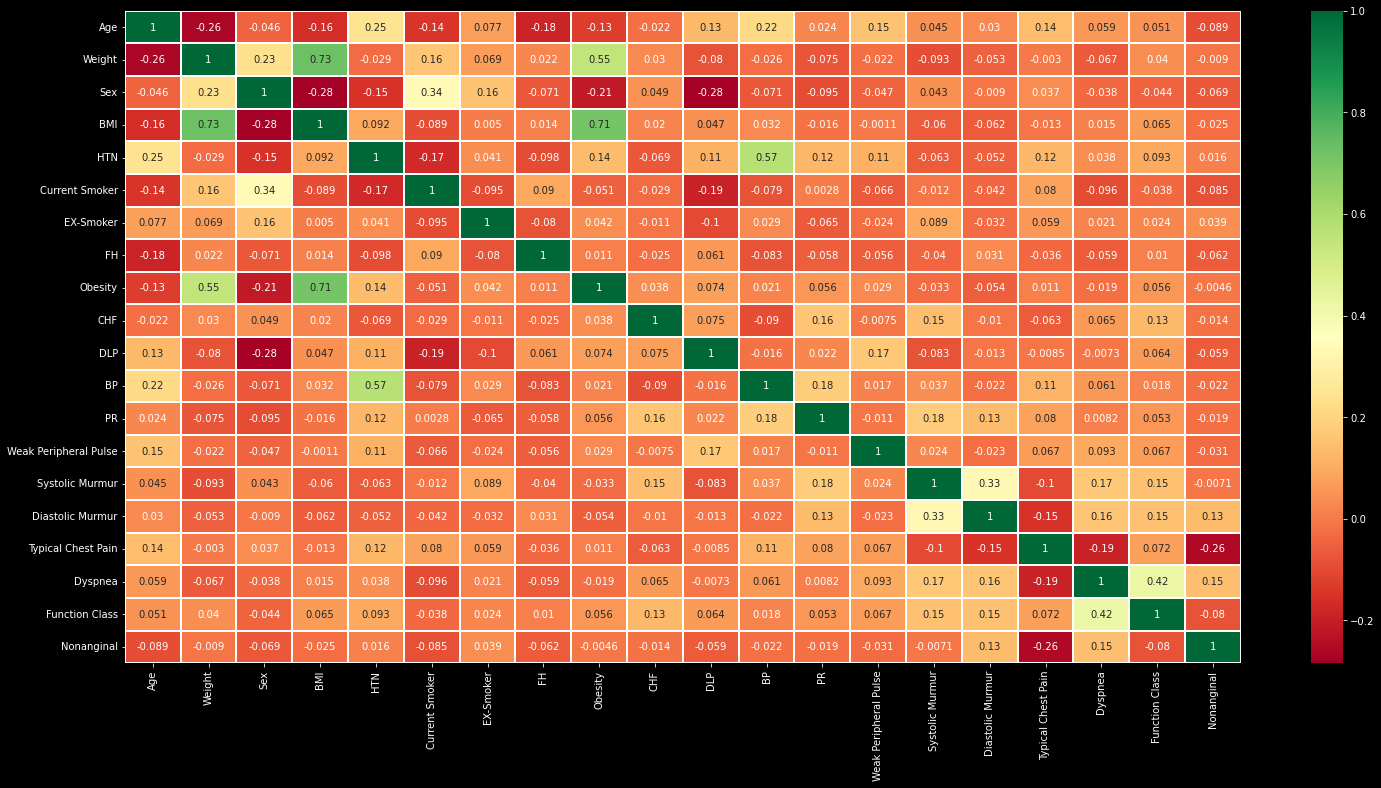

In [11]:
plt.figure(figsize=(25, 12))
corrmat = dataset.corr().head(20)
top_corr_features = corrmat.index
g=sns.heatmap(dataset[top_corr_features].corr(),annot=True,linewidth=.10,cmap="RdYlGn")

<AxesSubplot:>

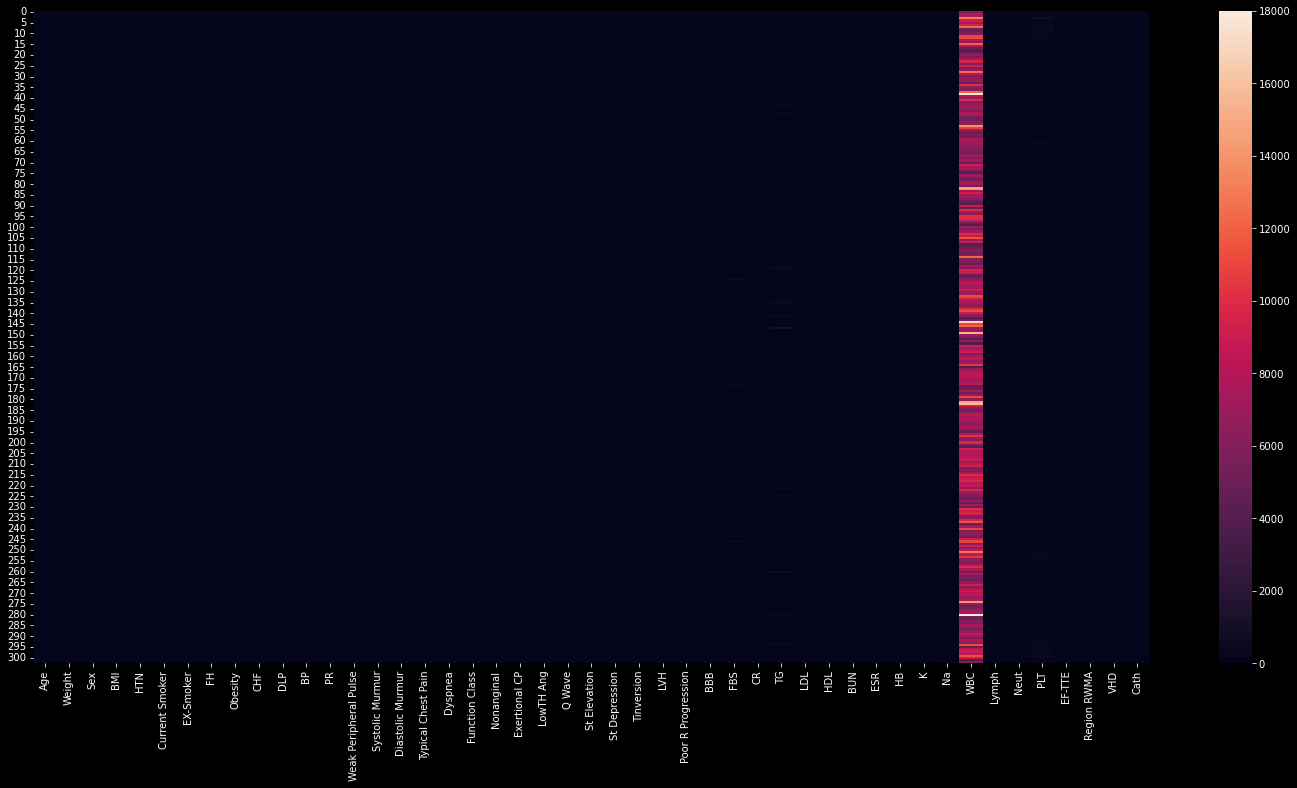

In [12]:
plt.figure(figsize=(25, 12))
sns.heatmap(dataset)

C:\Users\mahmo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age', ylabel='count'>

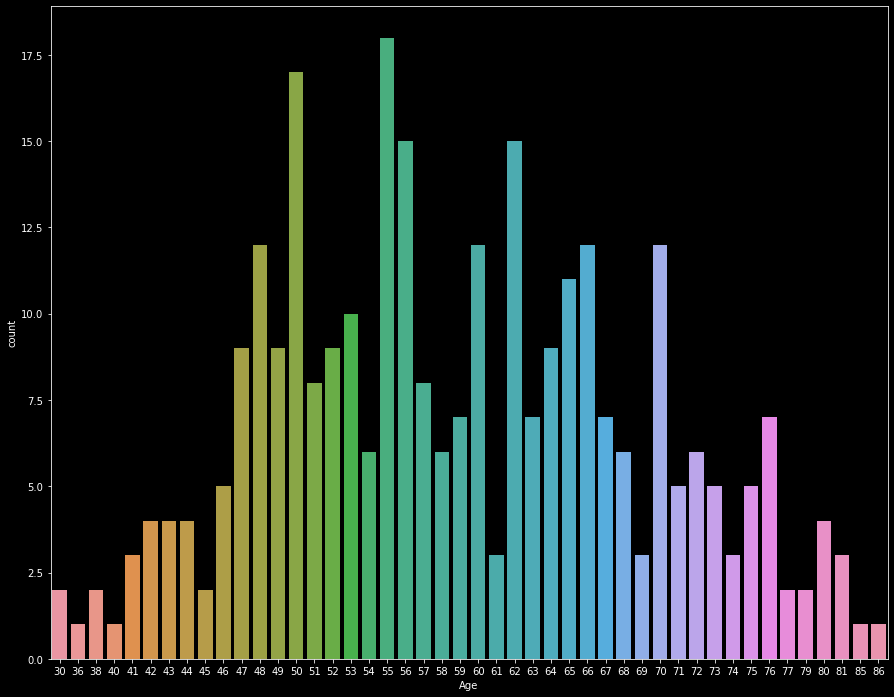

In [13]:
plt.figure(figsize=(15, 12))
sns.countplot (dataset['Age'])

<AxesSubplot:>

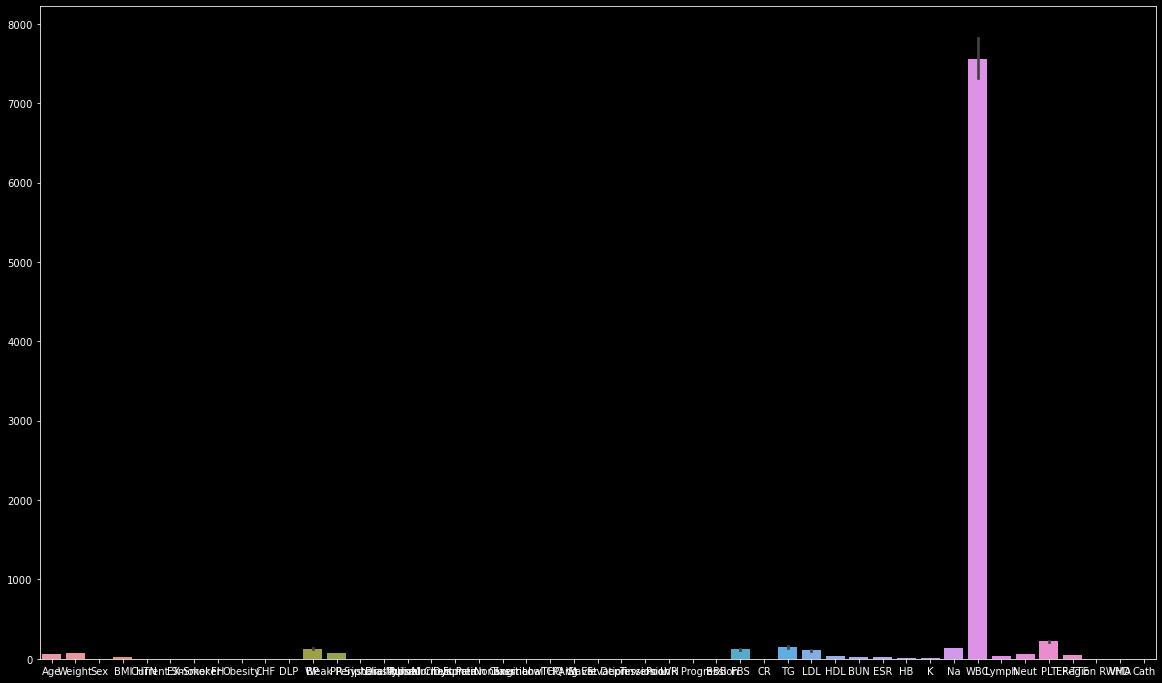

In [14]:
plt.figure(figsize=(20, 12))
sns.barplot(data=dataset)

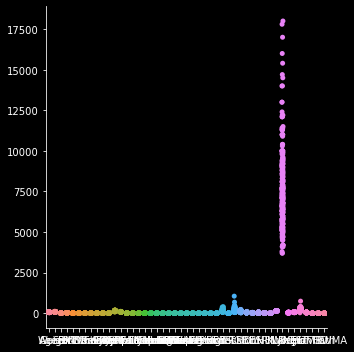

In [15]:
sns.catplot(data=dataset)

C:\Users\mahmo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Weight', ylabel='count'>

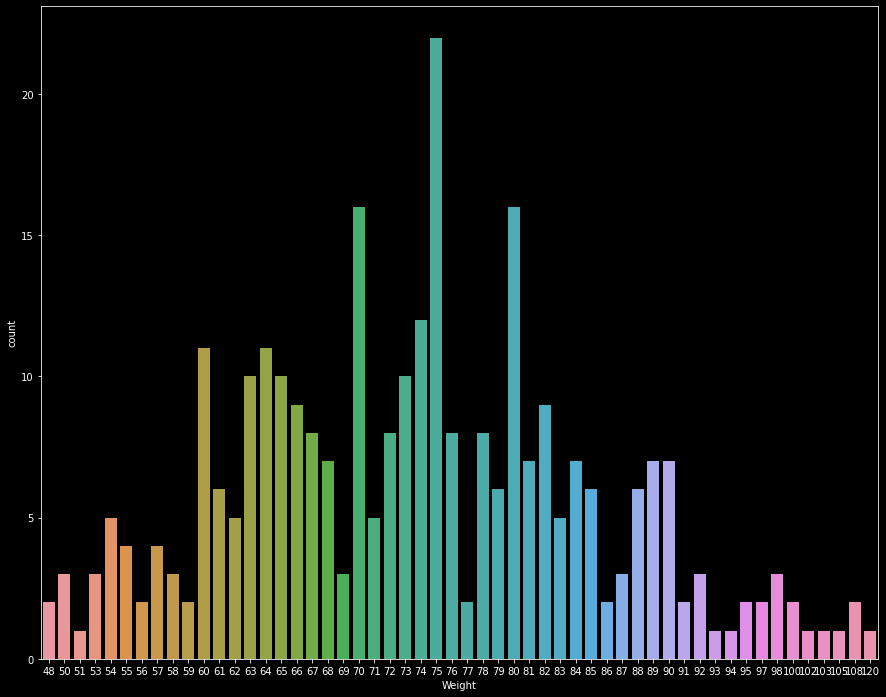

In [16]:
plt.figure(figsize=(15, 12))
sns.countplot (dataset['Weight'])

C:\Users\mahmo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='BP', ylabel='count'>

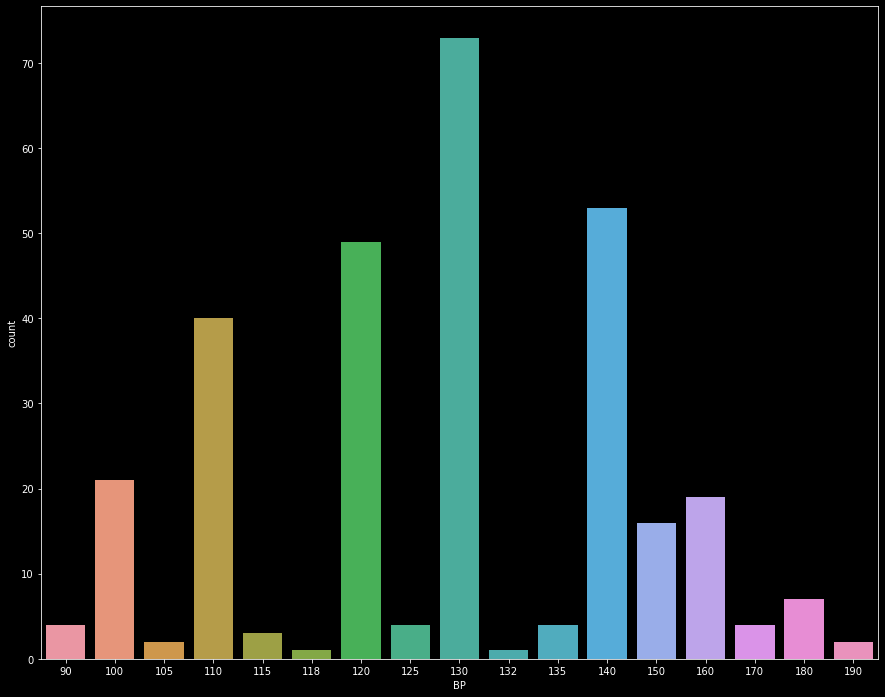

In [17]:
plt.figure(figsize=(15, 12))
sns.countplot (dataset['BP'])

C:\Users\mahmo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Cath', ylabel='count'>

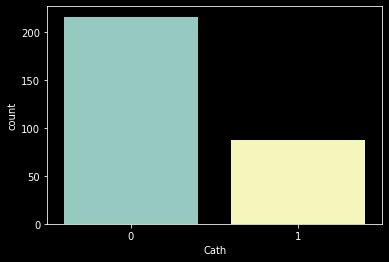

In [18]:
sns.countplot (dataset['Cath'])

In [19]:
x = dataset.iloc[:,:-1].values
x

array([[53., 90.,  1., ..., 50.,  0.,  1.],
       [67., 70.,  0., ..., 40.,  4.,  1.],
       [54., 54.,  1., ..., 40.,  2.,  3.],
       ...,
       [48., 77.,  0., ..., 55.,  0.,  1.],
       [57., 90.,  0., ..., 55.,  0.,  1.],
       [56., 85.,  0., ..., 55.,  0.,  1.]])

In [20]:
y = dataset.iloc[:,-1].values
y

array([0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,

In [21]:
SC = StandardScaler()
x[:,0:2] = SC.fit_transform(x[:,0:2])
x[:,3:4] = SC.fit_transform(x[:,3:4])
x[:,11:13] = SC.fit_transform(x[:,11:13])
x[:,29:46] = SC.fit_transform(x[:,29:46])

In [22]:
df_x = pd.DataFrame(x,columns = ['Age' , 'Weight' , 'Sex' , 'BMI' , 'HTN' , 'Current Smoker', 'EX-Smoker' , 'FH' , 'Obesity' , 
                                 'CHF' , 'DLP' ,'BP', 'PR' , 'Weak Peripheral Pulse' , 'Systolic Murmur' , 'Diastolic Murmur' , 
                                 'Typical Chest Pain'  , 'Dyspnea' , 'Function Class' , 'Nonanginal' , 'Exertional CP' , 'LowTH Ang' , 
                                 'Q Wave' , 'St Elevation' , 'St Depression' , 'Tinversion' , 'LVH' , 'Poor R Progression' , 'BBB' ,
                                 'FBS' , 'CR' , 'TG' , 'LDL' , 'HDL' , 'BUN' , 'ESR' , 'HB' , 'K' , 'Na' , 'WBC' , 'Lymph' , 'Neut' ,
                                 'PLT' , 'EF-TTE' , 'Region RWMA' , 'VHD'])
df_x

,Age,Weight,Sex,BMI,HTN,Current Smoker,EX-Smoker,FH,Obesity,CHF,...,HB,K,Na,WBC,Lymph,Neut,PLT,EF-TTE,Region RWMA,VHD
0,-0.568446,1.351012,1.0,0.522817,1.0,1.0,0.0,0.0,1.0,0.0,...,1.521673,1.025931,0.000868,-0.772712,0.662975,-0.801571,0.650977,0.310686,-0.548761,-0.840470
1,0.780937,-0.320172,0.0,0.281122,1.0,0.0,0.0,0.0,1.0,0.0,...,0.464323,1.025931,3.946579,0.057248,0.562534,-0.506461,-0.930681,-0.811339,2.988994,-0.840470
2,-0.472061,-1.657120,1.0,-1.752404,0.0,1.0,0.0,0.0,0.0,0.0,...,0.215534,1.025931,-0.525227,-0.067246,0.562534,-0.014609,0.140233,-0.811339,1.220117,0.965647
3,0.684552,-0.570850,0.0,-0.100118,1.0,0.0,0.0,0.0,1.0,0.0,...,-0.655225,0.370114,0.263916,2.256644,-1.446280,1.165833,8.575744,0.871699,-0.548761,0.062588
4,-0.857599,1.100334,0.0,2.423417,1.0,0.0,0.0,0.0,1.0,0.0,...,0.028943,-0.504308,-0.262179,0.679719,2.270027,-2.080384,0.865160,0.310686,-0.548761,0.062588
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,-0.086523,0.849657,1.0,0.614249,0.0,0.0,0.0,0.0,1.0,0.0,...,-0.530831,1.244536,1.316105,0.389232,0.160771,-0.211350,0.486221,-0.250327,-0.548761,-0.840470
299,-0.375677,-0.821528,0.0,0.110577,0.0,0.0,0.0,0.0,1.0,0.0,...,-0.468633,-0.504308,-0.525227,1.592675,-1.647161,1.952795,2.562147,-0.811339,-0.548761,0.965647
300,-1.050368,0.264742,0.0,0.691525,1.0,0.0,0.0,1.0,1.0,0.0,...,-0.219845,-0.504308,-0.262179,0.596722,0.261212,-0.506461,0.947538,0.871699,-0.548761,-0.840470
301,-0.182908,1.351012,0.0,2.040890,0.0,0.0,0.0,0.0,1.0,0.0,...,-1.899166,-0.941519,0.000868,-1.561175,1.566942,-1.982014,-0.222230,0.871699,-0.548761,-0.840470


<AxesSubplot:>

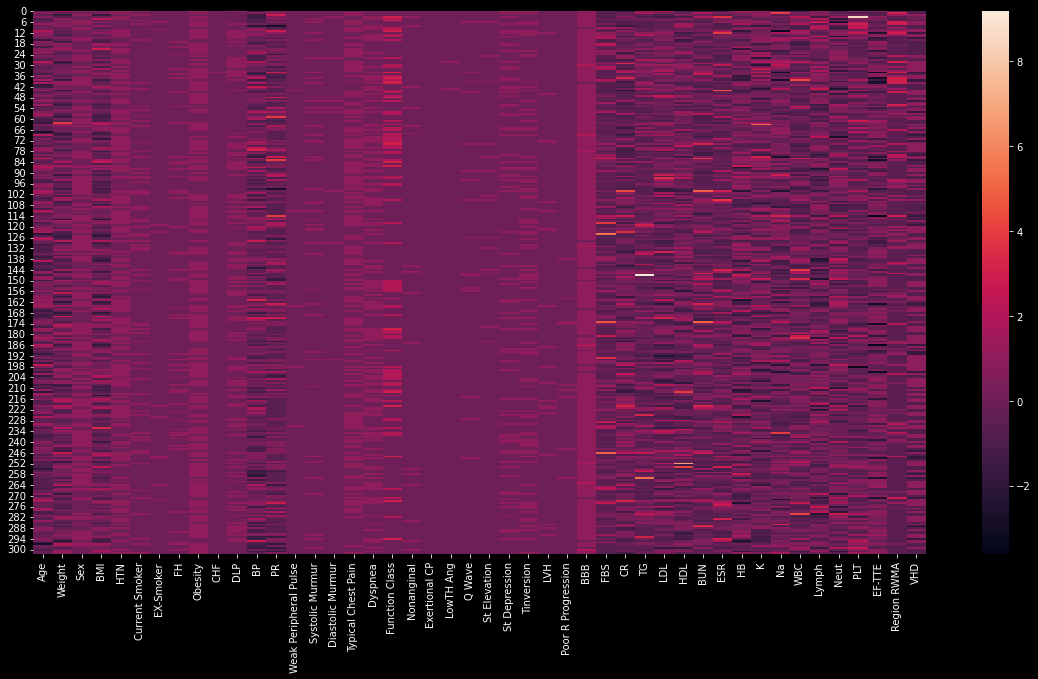

In [23]:
plt.figure(figsize=(20, 10))
sns.heatmap(df_x)

In [24]:
#plt.figure(figsize=(20, 10))
#sns.pairplot(df_x)

In [25]:
x_train,x_test,y_train,y_test = train_test_split (x ,y ,test_size = 0.2 ,random_state = 0)

In [26]:
x_train

array([[ 0.1062456 , -0.90508701,  0.        , ..., -0.81133948,
         2.10455564,  0.96564667],
       [ 0.39539904, -0.82152779,  0.        , ...,  0.87169929,
        -0.54876069,  0.96564667],
       [-0.3756768 ,  0.93321586,  1.        , ...,  0.31068636,
        -0.54876069,  0.06258821],
       ...,
       [ 0.68455248,  1.5181304 ,  1.        , ..., -0.25032656,
        -0.54876069,  0.96564667],
       [ 0.87732144, -0.15305402,  0.        , ..., -0.25032656,
        -0.54876069, -0.84047025],
       [ 0.29901456,  0.01406442,  0.        , ...,  0.31068636,
        -0.54876069, -0.84047025]])

In [27]:
x_test

array([[-1.05036816,  0.76609741,  1.        , ...,  0.87169929,
        -0.54876069,  0.96564667],
       [ 0.588168  ,  0.34830131,  0.        , ...,  0.87169929,
        -0.54876069,  0.96564667],
       [-0.27929232, -0.98864623,  0.        , ...,  0.87169929,
        -0.54876069,  0.96564667],
       ...,
       [-0.27929232, -0.0694948 ,  1.        , ..., -1.3723524 ,
        -0.54876069,  0.06258821],
       [ 0.1062456 , -0.82152779,  1.        , ...,  0.87169929,
        -0.54876069, -0.84047025],
       [ 0.39539904, -0.4872909 ,  1.        , ..., -1.3723524 ,
        -0.54876069,  0.96564667]])

In [28]:
y_train

array([0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0])

In [29]:
y_test

array([0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0])

# SVC ( 77% )

In [30]:
svc = SVC()
svc.fit(x_train, y_train)
y_pred = svc.predict(x_test)
print(y_pred)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 1 0 1 0 0 0
 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [31]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.78      0.95      0.86        44
           1       0.71      0.29      0.42        17

    accuracy                           0.77        61
   macro avg       0.75      0.62      0.64        61
weighted avg       0.76      0.77      0.73        61



[[42  2]
 [12  5]]


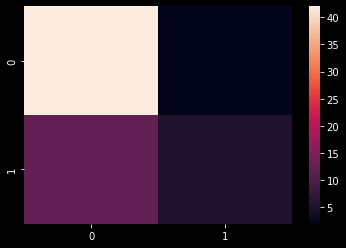

In [32]:
CM = confusion_matrix (y_test,y_pred)
sns.heatmap(CM)
print (CM)

In [33]:
df_comp = pd.DataFrame({'Actual':y_test , 'Predict':y_pred})
df_comp

,Actual,Predict
0,0,0
1,0,0
2,0,0
3,1,0
4,0,0
...,...,...
56,0,0
57,0,0
58,1,0
59,1,0


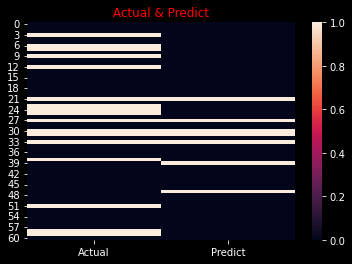

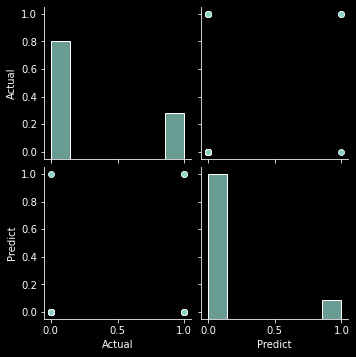

In [34]:
plt.title (' Actual & Predict ',color = 'r')
sns.heatmap(df_comp)
sns.pairplot(df_comp)

In [35]:
print ('y_test = ',y_test.sum())
print ('y_pred = ',y_pred.sum())

y_test =  17
y_pred =  7


([<matplotlib.patches.Wedge at 0x17f0a1dd550>,
 [Text(-0.8446684809063426, 0.7046525082360607, 'Cath'),
  Text(0.8446684149320097, -0.7046525873196283, 'not Cath')],
 [Text(-0.4607282623125505, 0.3843559135833058, '28%'),
  Text(0.4607282263265507, -0.3843559567197972, '72%')])

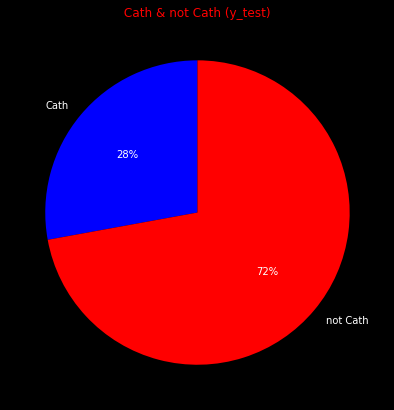

In [36]:
plt.figure(figsize=(10,7))
data = [17,44]
names = ['Cath','not Cath']
plt.title (' Cath & not Cath (y_test) ',color = 'red')
plt.pie (data,labels = names,labeldistance = 1.1,startangle = 90,colors = ['blue','red'],autopct = '%1.0f%%',)

([<matplotlib.patches.Wedge at 0x17f0a51ecd0>,
 [Text(-0.38802728651500107, 1.0292885042201751, 'Cath'),
  Text(0.38802733469947265, -1.029288486055306, 'not Cath')],
 [Text(-0.21165124719000059, 0.5614300932110046, '11%'),
  Text(0.2116512734724396, -0.5614300833028941, '89%')])

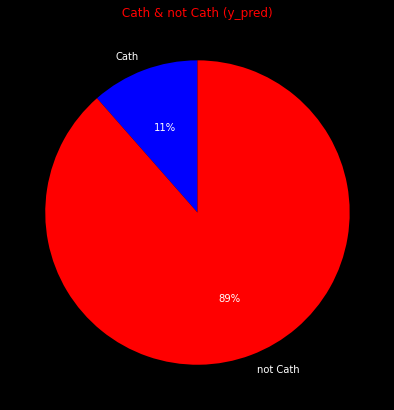

In [37]:
plt.figure(figsize=(10,7))
data = [7,54]
names = ['Cath','not Cath']
plt.title (' Cath & not Cath (y_pred) ',color = 'red')
plt.pie (data,labels = names,labeldistance = 1.1,startangle = 90,colors = ['blue','red'],autopct = '%1.0f%%',)

([<matplotlib.patches.Wedge at 0x17f0a563460>,
 [Text(-0.7274431012982646, -0.8251221330042984, 'Correct Result'),
  Text(0.727443139925019, 0.8251220989502278, 'Wrong Result')],
 [Text(-0.39678714616268973, -0.4500666180023445, '77%'),
  Text(0.3967871672318285, 0.4500665994273969, '23%')])

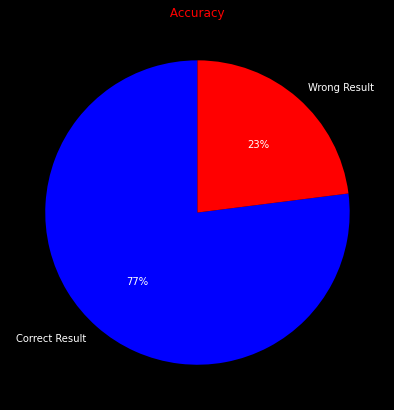

In [38]:
plt.figure(figsize=(10,7))
data = [77,23]
names = ['Correct Result','Wrong Result']
plt.title (' Accuracy ',color = 'red')
plt.pie (data,labels = names,labeldistance = 1.1,startangle = 90,colors = ['blue','red'],autopct = '%1.0f%%',)

# Random Forest Classifier ( 87% )

In [39]:
RFC=RandomForestClassifier(n_estimators=2000,random_state=0)
RFC.fit(x_train,y_train)
y_pred_2 = RFC.predict(x_test)
y_pred_2

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0])

In [40]:
print(classification_report(y_test,y_pred_2))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92        44
           1       1.00      0.53      0.69        17

    accuracy                           0.87        61
   macro avg       0.92      0.76      0.80        61
weighted avg       0.89      0.87      0.85        61



[[44  0]
 [ 8  9]]


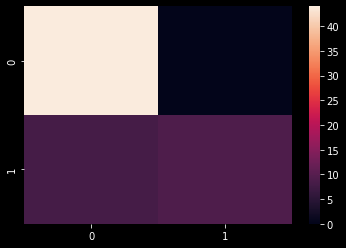

In [41]:
CM = confusion_matrix (y_test,y_pred_2)
sns.heatmap(CM)
print (CM)

In [42]:
df_comp_2 = pd.DataFrame({'Actual':y_test , 'Predict':y_pred_2})
df_comp_2

,Actual,Predict
0,0,0
1,0,0
2,0,0
3,1,0
4,0,0
...,...,...
56,0,0
57,0,0
58,1,1
59,1,0


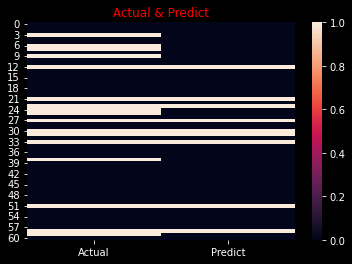

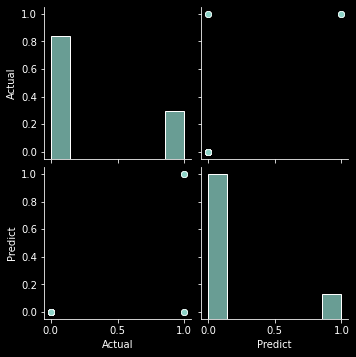

In [43]:
plt.title (' Actual & Predict ',color = 'r')
sns.heatmap(df_comp_2)
sns.pairplot(df_comp_2)

In [44]:
print ('y_test = ',y_test.sum())
print ('y_pred = ',y_pred_2.sum())

y_test =  17
y_pred =  9


([<matplotlib.patches.Wedge at 0x17f0cd05280>,
 [Text(-0.8446684809063426, 0.7046525082360607, 'Cath'),
  Text(0.8446684149320097, -0.7046525873196283, 'not Cath')],
 [Text(-0.4607282623125505, 0.3843559135833058, '28%'),
  Text(0.4607282263265507, -0.3843559567197972, '72%')])

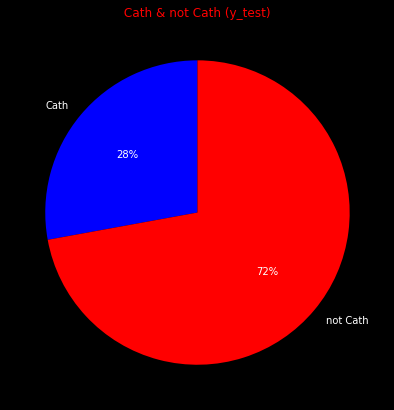

In [45]:
plt.figure(figsize=(10,7))
data = [17,44]
names = ['Cath','not Cath']
plt.title (' Cath & not Cath (y_test) ',color = 'red')
plt.pie (data,labels = names,labeldistance = 1.1,startangle = 90,colors = ['blue','red'],autopct = '%1.0f%%',)

([<matplotlib.patches.Wedge at 0x17f0cd49af0>,
 [Text(-0.49180318134487616, 0.9839357859225668, 'Cath'),
  Text(0.49180318134487605, -0.9839357859225668, 'not Cath')],
 [Text(-0.2682562807335688, 0.5366922468668546, '15%'),
  Text(0.2682562807335687, -0.5366922468668546, '85%')])

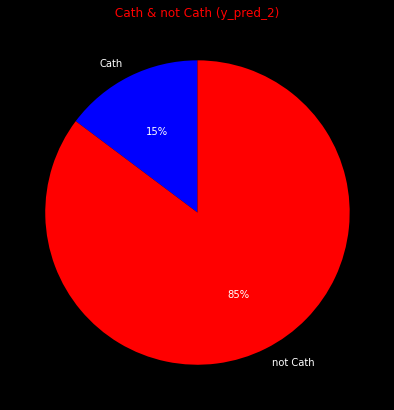

In [46]:
plt.figure(figsize=(10,7))
data = [9,52]
names = ['Cath','not Cath']
plt.title (' Cath & not Cath (y_pred_2) ',color = 'red')
plt.pie (data,labels = names,labeldistance = 1.1,startangle = 90,colors = ['blue','red'],autopct = '%1.0f%%',)

([<matplotlib.patches.Wedge at 0x17f0cd9f250>,
 [Text(-0.4368626645752139, -1.0095300947967052, 'Correct Result'),
  Text(0.436862664575214, 1.009530094796705, 'Wrong Result')],
 [Text(-0.23828872613193483, -0.550652778980021, '87%'),
  Text(0.23828872613193489, 0.5506527789800209, '13%')])

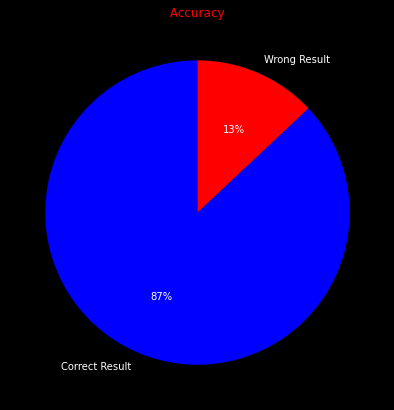

In [47]:
plt.figure(figsize=(10,7))
data = [87,13]
names = ['Correct Result','Wrong Result']
plt.title (' Accuracy ',color = 'red')
plt.pie (data,labels = names,labeldistance = 1.1,startangle = 90,colors = ['blue','red'],autopct = '%1.0f%%',)

# K Neighbors Classifier ( 85% )

In [48]:
KNN=KNeighborsClassifier(n_neighbors=10)
KNN.fit(x_train,y_train)
y_pred_3 = KNN.predict(x_test)
y_pred_3

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0])

In [49]:
print(classification_report(y_test,y_pred_3))

              precision    recall  f1-score   support

           0       0.83      1.00      0.91        44
           1       1.00      0.47      0.64        17

    accuracy                           0.85        61
   macro avg       0.92      0.74      0.77        61
weighted avg       0.88      0.85      0.83        61



[[44  0]
 [ 9  8]]


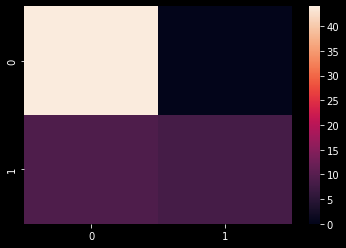

In [50]:
CM = confusion_matrix (y_test,y_pred_3)
sns.heatmap(CM)
print (CM)

In [51]:
df_comp_3 = pd.DataFrame({'Actual':y_test , 'Predict':y_pred_3})
df_comp_3

,Actual,Predict
0,0,0
1,0,0
2,0,0
3,1,0
4,0,0
...,...,...
56,0,0
57,0,0
58,1,1
59,1,0


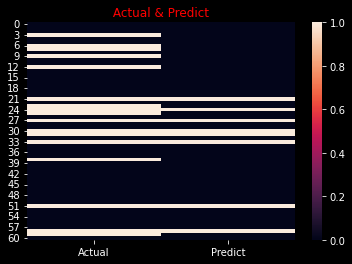

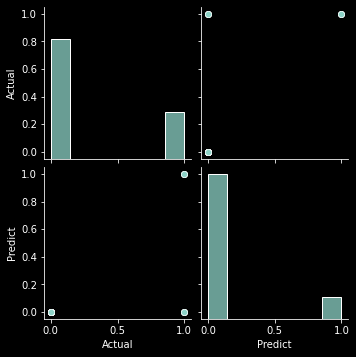

In [52]:
plt.title (' Actual & Predict ',color = 'r')
sns.heatmap(df_comp_3)
sns.pairplot(df_comp_3)

In [53]:
print ('y_test = ',y_test.sum())
print ('y_pred = ',y_pred_3.sum())

y_test =  17
y_pred =  8


([<matplotlib.patches.Wedge at 0x17f0bad1790>,
 [Text(-0.8446684809063426, 0.7046525082360607, 'Cath'),
  Text(0.8446684149320097, -0.7046525873196283, 'not Cath')],
 [Text(-0.4607282623125505, 0.3843559135833058, '28%'),
  Text(0.4607282263265507, -0.3843559567197972, '72%')])

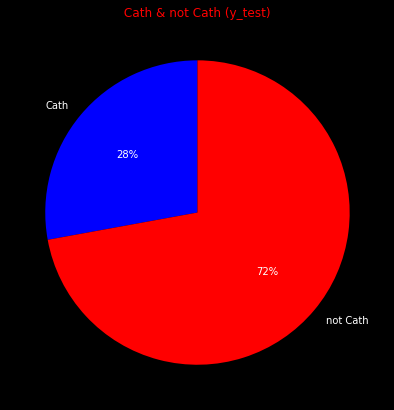

In [54]:
plt.figure(figsize=(10,7))
data = [17,44]
names = ['Cath','not Cath']
plt.title (' Cath & not Cath (y_test) ',color = 'red')
plt.pie (data,labels = names,labeldistance = 1.1,startangle = 90,colors = ['blue','red'],autopct = '%1.0f%%',)

([<matplotlib.patches.Wedge at 0x17f0ba1a970>,
 [Text(-0.4404992730104196, 1.0079486050773085, 'Cath'),
  Text(0.4404991786394584, -1.0079486463198226, 'not Cath')],
 [Text(-0.24027233073295612, 0.5497901482239864, '13%'),
  Text(0.24027227925788636, -0.5497901707199031, '87%')])

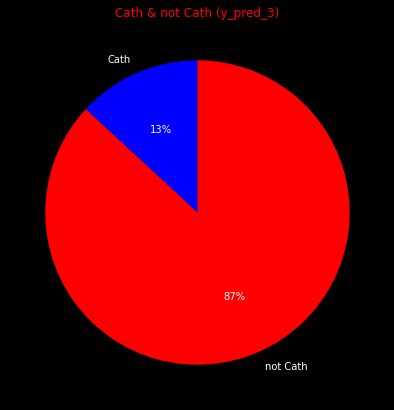

In [55]:
plt.figure(figsize=(10,7))
data = [8,53]
names = ['Cath','not Cath']
plt.title (' Cath & not Cath (y_pred_3) ',color = 'red')
plt.pie (data,labels = names,labeldistance = 1.1,startangle = 90,colors = ['blue','red'],autopct = '%1.0f%%',)

([<matplotlib.patches.Wedge at 0x17f0b97b370>,
 [Text(-0.49938947630209474, -0.9801072140121813, 'Correct Result'),
  Text(0.49938938453783266, 0.980107260768394, 'Wrong Result')],
 [Text(-0.27239425980114257, -0.5346039349157352, '85%'),
  Text(0.2723942097479087, 0.534603960419124, '15%')])

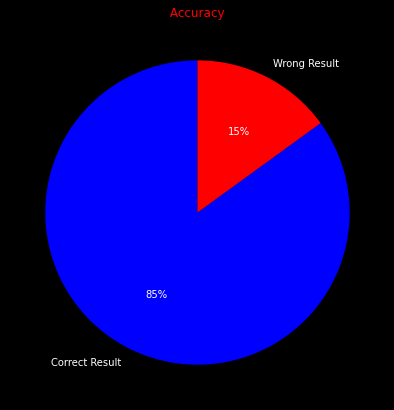

In [56]:
plt.figure(figsize=(10,7))
data = [85,15]
names = ['Correct Result','Wrong Result']
plt.title (' Accuracy ',color = 'red')
plt.pie (data,labels = names,labeldistance = 1.1,startangle = 90,colors = ['blue','red'],autopct = '%1.0f%%',)

# XG Boost Classifier ( 0.90% )

In [57]:
xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=0)
xgb_model.fit(x_train,y_train)
y_pred_4 = xgb_model.predict(x_test)
y_pred_4

C:\Users\mahmo\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:46:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


array([0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0])

In [58]:
print(classification_report(y_test,y_pred_4))

              precision    recall  f1-score   support

           0       0.90      0.98      0.93        44
           1       0.92      0.71      0.80        17

    accuracy                           0.90        61
   macro avg       0.91      0.84      0.87        61
weighted avg       0.90      0.90      0.90        61



[[43  1]
 [ 5 12]]


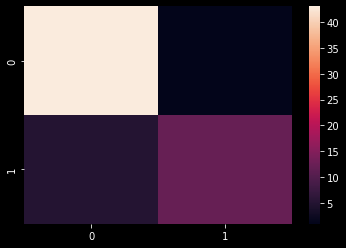

In [59]:
CM = confusion_matrix (y_test,y_pred_4)
sns.heatmap(CM)
print (CM)

In [60]:
df_comp_4 = pd.DataFrame({'Actual':y_test , 'Predict':y_pred_4})
df_comp_4

,Actual,Predict
0,0,0
1,0,0
2,0,0
3,1,1
4,0,0
...,...,...
56,0,0
57,0,0
58,1,1
59,1,0


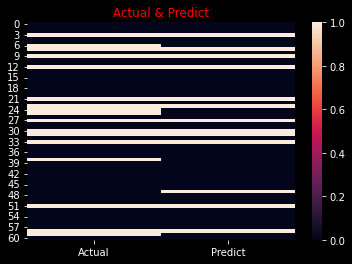

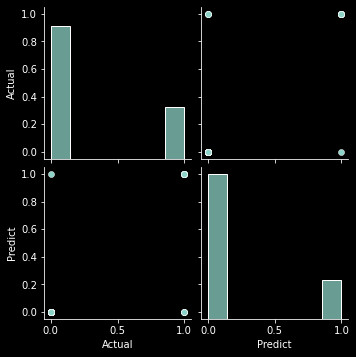

In [61]:
plt.title (' Actual & Predict ',color = 'r')
sns.heatmap(df_comp_4)
sns.pairplot(df_comp_4)

In [62]:
print ('y_test = ',y_test.sum())
print ('y_pred = ',y_pred_4.sum())

y_test =  17
y_pred =  13


([<matplotlib.patches.Wedge at 0x17f134dca30>,
 [Text(-0.8446684809063426, 0.7046525082360607, 'Cath'),
  Text(0.8446684149320097, -0.7046525873196283, 'not Cath')],
 [Text(-0.4607282623125505, 0.3843559135833058, '28%'),
  Text(0.4607282263265507, -0.3843559567197972, '72%')])

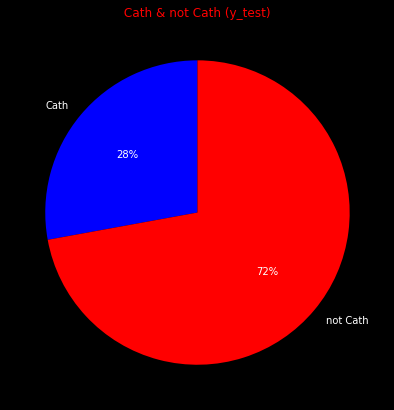

In [63]:
plt.figure(figsize=(10,7))
data = [17,44]
names = ['Cath','not Cath']
plt.title (' Cath & not Cath (y_test) ',color = 'red')
plt.pie (data,labels = names,labeldistance = 1.1,startangle = 90,colors = ['blue','red'],autopct = '%1.0f%%',)

([<matplotlib.patches.Wedge at 0x17f135301f0>,
 [Text(-0.6826704280243604, 0.8625317888060919, 'Cath'),
  Text(0.6826704684023871, -0.8625317568479816, 'not Cath')],
 [Text(-0.37236568801328745, 0.4704718848033228, '21%'),
  Text(0.37236571003766566, -0.4704718673716263, '79%')])

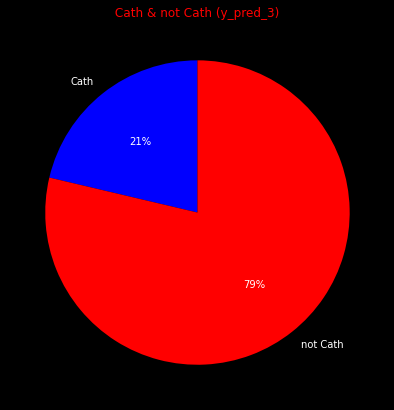

In [64]:
plt.figure(figsize=(10,7))
data = [13,48]
names = ['Cath','not Cath']
plt.title (' Cath & not Cath (y_pred_3) ',color = 'red')
plt.pie (data,labels = names,labeldistance = 1.1,startangle = 90,colors = ['blue','red'],autopct = '%1.0f%%',)

([<matplotlib.patches.Wedge at 0x17f135749a0>,
 [Text(-0.33991877217145866, -1.046162142464278, 'Correct Result'),
  Text(0.3399188456330338, 1.0461621185951564, 'Wrong Result')],
 [Text(-0.18541023936625015, -0.5706338958896061, '90%'),
  Text(0.18541027943620023, 0.5706338828700852, '10%')])

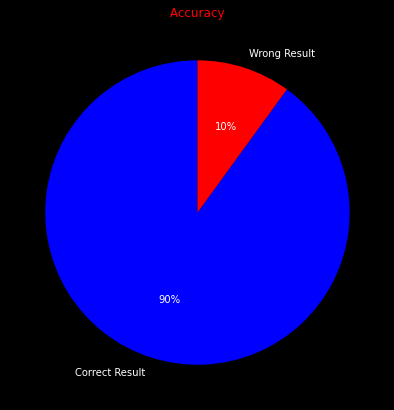

In [65]:
plt.figure(figsize=(10,7))
data = [90,10]
names = ['Correct Result','Wrong Result']
plt.title (' Accuracy ',color = 'red')
plt.pie (data,labels = names,labeldistance = 1.1,startangle = 90,colors = ['blue','red'],autopct = '%1.0f%%',)